In [35]:
import tensorflow as tf
tensorflow.test.gpu_device_name()
import tensorflow.keras
from tensorflow.keras import backend as K

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Rescaling
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from time import time
import random

In [36]:
def generatePlot(history):
    # Extracción de datos
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    # Creación del gráfico de accuracy
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training')
    plt.plot(epochs, val_acc, 'r', label='Validation')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Creación del gráfico de loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training')
    plt.plot(epochs, val_loss, 'r', label='Validation')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [37]:
# DATA SOURCE --------------------------------------------------

train_data_dir = '/kaggle/input/gemstones/FYP_Datasets/train'
validation_data_dir = '/kaggle/input/gemstones/FYP_Datasets/validation'
test_data_dir = '/kaggle/input/gemstones/FYP_Datasets/test'
image_size = (150, 150)
batch_size = 64

In [38]:
# DATA AUGMENTATION --------------------------------------------

# Crear un generador para aumentar datos de entrenamiento
train_datagen = ImageDataGenerator(
    shear_range=0.2,   # Rango para las transformaciones aleatorias
    zoom_range=0.2,    # Rango para el zoom aleatorio
    horizontal_flip=True) # Activar el giro horizontal aleatorio

# Cargar imágenes de entrenamiento
train_ds = train_datagen.flow_from_directory(
    train_data_dir,  # Directorio con datos de entrenamiento
    target_size=image_size,  # Cambiar el tamaño de las imágenes a 150x150
    batch_size=batch_size,
    class_mode='categorical'  # 'binary' para clasificación binaria,'categorical' para multiclase
)

# Cargar imágenes de validación
validation_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    validation_data_dir,  # Directorio con datos de validación
    image_size=image_size,  # Cambiar el tamaño de las imágenes a 150x150
    batch_size=batch_size,
    label_mode='categorical'
)

# Cargar imágenes de prueba
test_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,    # Directorio con datos de prueba
    image_size=image_size,  # Cambiar el tamaño de las imágenes a 150x150
    batch_size=batch_size,
    label_mode='categorical'
)

validation_ds = validation_ds.prefetch(buffer_size=32)
test_ds = test_ds.prefetch(buffer_size=32)

Found 3043 images belonging to 6 classes.
Found 1500 files belonging to 6 classes.
Found 1500 files belonging to 6 classes.


In [39]:
# MODEL --------------------------------------------------

model = Sequential()
model.add(Rescaling(scale=(1./127.5),offset=-1, input_shape=(150, 150, 3)))

#model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(6, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_12 (Dropout)        (None, 36, 36, 64)       

In [40]:
optimizer = 'adam'

model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

Epoch 1/100


2024-01-08 18:37:11.458867: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_4/dropout_12/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


48/48 [==============================] - 26s 505ms/step - loss: 0.9659 - accuracy: 0.6277 - val_loss: 0.6255 - val_accuracy: 0.7320
Epoch 2/100
48/48 [==============================] - 24s 507ms/step - loss: 0.4037 - accuracy: 0.8610 - val_loss: 0.5867 - val_accuracy: 0.7507
Epoch 3/100
48/48 [==============================] - 25s 512ms/step - loss: 0.2924 - accuracy: 0.9027 - val_loss: 0.5602 - val_accuracy: 0.7960
Epoch 4/100
48/48 [==============================] - 25s 509ms/step - loss: 0.2627 - accuracy: 0.8998 - val_loss: 0.4682 - val_accuracy: 0.8500
Epoch 5/100
48/48 [==============================] - 24s 505ms/step - loss: 0.2375 - accuracy: 0.9136 - val_loss: 0.5540 - val_accuracy: 0.8080
Epoch 6/100
48/48 [==============================] - 25s 516ms/step - loss: 0.1963 - accuracy: 0.9297 - val_loss: 0.4697 - val_accuracy: 0.8173
Epoch 7/100
48/48 [==============================] - 25s 511ms/step - loss: 0.1755 - accuracy: 0.9346 - val_loss: 0.4452 - val_accuracy: 0.8567
Epoc

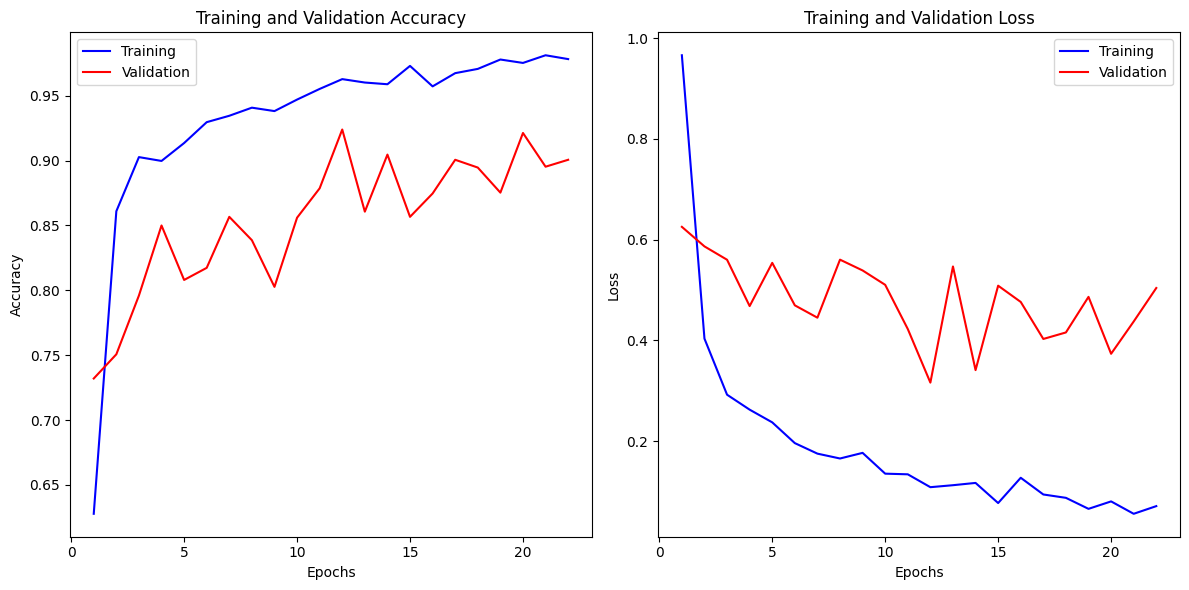

In [41]:
# TRAINING --------------------------------------------------
from tensorflow.keras.callbacks import EarlyStopping

epochs = 100

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(
          train_ds,
          epochs=epochs,
          validation_data = validation_ds,
          callbacks = [es]
)
generatePlot(history)

In [42]:
# TESTING --------------------------------------------------

# Establecer una semilla para reproducibilidad
seed_value = 73
random.seed(seed_value)        # Semilla para Python
np.random.seed(seed_value)     # Semilla para NumPy
tf.random.set_seed(seed_value) # Semilla para TensorFlow/Keras

# A partir de aquí, puedes continuar con la construcción y entrenamiento de tu modelo de Keras

etiquetas = ['Emerald', 'Fake_Emerald', 'Fake_Ruby', 'Fake_Turquoise', 'Ruby', 'Turquoise']
clases_predichas = {etiqueta: {'real': 0, 'predicha': 0} for etiqueta in etiquetas}  # Inicializar el contador para cada clase

total = 0
hits = 0

print("PREDICHA -> REAL")

for minilote in test_ds:
    prediccion_minilote = model.predict(minilote[0].numpy())
    etiqueta_real_minilote = minilote[1].numpy()

    for y_predicha, y_real in zip(np.round(prediccion_minilote, 3), etiqueta_real_minilote):
        total += 1
        clase_predicha = etiquetas[np.argmax(y_predicha)]
        clase_real = etiquetas[np.argmax(y_real)]

        clases_predichas[clase_predicha]['predicha'] += 1  # Incrementar el contador de predicciones de la clase predicha
        clases_predichas[clase_real]['real'] += 1  # Incrementar el contador de predicciones de la clase real

        if np.argmax(y_predicha) == np.argmax(y_real):
            hits += 1

        # Imprimir las predicciones y errores como antes
        if np.argmax(y_predicha) == np.argmax(y_real):
            print(clase_predicha, "->", clase_real)
        else:
            print(clase_predicha, "->", clase_real, "✘")

print("===============================")
print("TOTAL: ", total, " | HITS: ", hits)
print("HITS PERCENTAGE: ", round(hits/total * 100, 2), "%")
print("===============================")
print("Recuento de predicciones por clase:")
for etiqueta, counts in clases_predichas.items():
    print(f"{etiqueta}: Real - {counts['real']} | Predicha - {counts['predicha']}")

PREDICHA -> REAL
2/2 [==============================] - 0s 7ms/step
Emerald -> Emerald
Emerald -> Emerald
Emerald -> Emerald
Turquoise -> Turquoise
Fake_Emerald -> Fake_Emerald
Fake_Ruby -> Fake_Ruby
Fake_Turquoise -> Fake_Turquoise
Fake_Turquoise -> Fake_Turquoise
Ruby -> Ruby
Fake_Emerald -> Fake_Emerald
Ruby -> Ruby
Fake_Ruby -> Fake_Ruby
Fake_Emerald -> Fake_Emerald
Turquoise -> Turquoise
Turquoise -> Turquoise
Fake_Turquoise -> Fake_Turquoise
Emerald -> Emerald
Fake_Ruby -> Fake_Ruby
Emerald -> Emerald
Turquoise -> Turquoise
Fake_Turquoise -> Fake_Turquoise
Fake_Turquoise -> Fake_Turquoise
Fake_Turquoise -> Fake_Turquoise
Fake_Emerald -> Fake_Emerald
Fake_Ruby -> Fake_Ruby
Fake_Ruby -> Fake_Ruby
Fake_Emerald -> Fake_Emerald
Emerald -> Emerald
Fake_Turquoise -> Fake_Turquoise
Fake_Ruby -> Fake_Turquoise ✘
Fake_Ruby -> Fake_Ruby
Fake_Emerald -> Fake_Emerald
Ruby -> Ruby
Turquoise -> Turquoise
Emerald -> Emerald
Fake_Ruby -> Fake_Ruby
Fake_Ruby -> Fake_Ruby
Fake_Turquoise -> Fake_Tur

1/1 [==============================] - 0s 22ms/step
              precision    recall  f1-score   support

           0     0.9785    0.9120    0.9441       250
           1     0.9151    0.9920    0.9520       250
           2     0.9291    0.9960    0.9614       250
           3     0.9048    0.8360    0.8690       250
           4     0.9960    1.0000    0.9980       250
           5     0.9065    0.8920    0.8992       250

    accuracy                         0.9380      1500
   macro avg     0.9383    0.9380    0.9373      1500
weighted avg     0.9383    0.9380    0.9373      1500



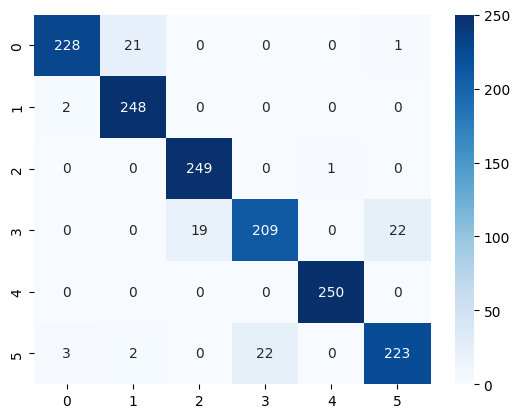

In [43]:
# CONFUSION MATRIX --------------------------------------

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

results = np.concatenate([(y, model.predict(x=x)) for x, y in test_ds], axis=1)

labels = np.argmax(results[0], axis=1)
predictions = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))